In [66]:
import pandas as pd
import numpy as np

In [67]:
path = "STRESS_AND_STRESS_MANAGEMENT_-_all_versions_-_labels_-_2023-10-10-09-36-41.xlsx"
data  = pd.read_excel(path)
data.head()

,start,end,Name of the respondent,Gender,Age,Tick the right choice,"If you are a student ,what are you currently pursuing",What kind a person would you rate yourself to be?,What kind a person would you rate yourself to be?/Quite,What kind a person would you rate yourself to be?/Calm,...,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,__version__,_tags,_index
0,2023-10-03 15:43:21.595,2023-10-03 15:46:38.266,Cecile Awika,Female,18-22,I am a student,Undergraduate,Calm Energetic,0.0,1.0,...,274765337,5a2c63ec-ac41-4692-84a1-9b31fc420a7e,2023-10-03 12:47:47,NaN,NaN,submitted_via_web,NaN,vMsivZB8jaAFkkyqy6zKJC,NaN,1
1,2023-10-03 15:39:48.210,2023-10-03 15:55:30.522,Jael Magero,Female,18-22,I am a student,Undergraduate,Calm,0.0,1.0,...,274767898,2c5cafcf-14b6-4f43-b264-ae2047ff01f6,2023-10-03 12:56:40,NaN,NaN,submitted_via_web,NaN,vMsivZB8jaAFkkyqy6zKJC,NaN,2
2,2023-10-03 16:10:04.316,2023-10-03 16:13:03.619,NaN,Male,18-22,I am a student,Undergraduate,Active,0.0,0.0,...,274773226,0bc7e4f4-797d-4d11-9cfa-f655fe64f1bd,2023-10-03 13:13:05,NaN,NaN,submitted_via_web,NaN,vMsivZB8jaAFkkyqy6zKJC,NaN,3
3,2023-10-03 16:10:44.426,2023-10-03 16:13:26.890,Sarah robi,Female,18-22,I am a student,Undergraduate,Calm,0.0,1.0,...,274773391,5aa79243-cbf8-4876-9b2f-16927d55a54c,2023-10-03 13:13:29,NaN,NaN,submitted_via_web,NaN,vMsivZB8jaAFkkyqy6zKJC,NaN,4
4,2023-10-03 16:17:01.492,2023-10-03 16:17:06.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,274774351,b77b4792-8ba5-488f-95e9-a5234f75e37a,2023-10-03 13:17:07,NaN,NaN,submitted_via_web,NaN,vMsivZB8jaAFkkyqy6zKJC,NaN,5


In [68]:
data.columns

Index(['start', 'end', 'Name of the respondent', 'Gender', 'Age',
       'Tick the right choice',
       'If you are a student ,what are you currently pursuing',
       'What kind a person would you rate yourself to be?',
       'What kind a person would you rate yourself to be?/Quite',
       'What kind a person would you rate yourself to be?/Calm ',
       'What kind a person would you rate yourself to be?/Energetic',
       'What kind a person would you rate yourself to be?/Active',
       'How do you rate yourself in terms of sociability?',
       'Do you struggle to fall asleep at night?',
       'On average,do you get less than 7-8 hours of sleep a night?',
       'Do you feel irritable,annoyed or angry over trival issues?',
       'How often are you stressed?',
       'How do you feel when things get out of control?',
       'What do you do when angry or when with pressure situations?',
       'Do you feel like withdrawing from family ,friends and isolating yourself?',
       'W

In [69]:
data["What kind a person would you rate yourself to be?/Quite"].value_counts()

What kind a person would you rate yourself to be?/Quite
0.0    37
1.0     1
Name: count, dtype: int64

In [70]:
data["What kind a person would you rate yourself to be?/Quite"].isna().sum()

14

In [71]:
data["What kind a person would you rate yourself to be?/Quite"] = data[
    "What kind a person would you rate yourself to be?/Quite"].fillna(0)

In [72]:
data["What kind a person would you rate yourself to be?/Quite"].isna().sum()

0

In [73]:
data.isna().sum()

start                                                                                 0
end                                                                                   0
Name of the respondent                                                               16
Gender                                                                               14
Age                                                                                  15
Tick the right choice                                                                15
If you are a student ,what are you currently pursuing                                20
What kind a person would you rate yourself to be?                                    14
What kind a person would you rate yourself to be?/Quite                               0
What kind a person would you rate yourself to be?/Calm                               14
What kind a person would you rate yourself to be?/Energetic                          14
What kind a person would you rat

In [93]:
data["How often are you stressed?"].isna().sum()

0

In [74]:
data.dropna(subset=["Name of the respondent"],inplace=True)

In [75]:

# Check if "Age" column contains only numeric values
if pd.api.types.is_numeric_dtype(data["Age"]):
    # Check if there are missing values in the "Age" column
    if data["Age"].isnull().any():
        # Compute the mean of the "Age" column
        mean_age = data["Age"].mean()
        # Fill missing values with the mean
        data["Age"].fillna(mean_age, inplace=True)
    else:
        # Handle the case when there are no missing values
        print("No missing values in the 'Age' column.")
else:
    # Handle the case when the "Age" column contains non-numeric values
    print("The 'Age' column contains non-numeric values.")

The 'Age' column contains non-numeric values.


In [76]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["Age"] = label_encoder.fit_transform(
    data["Age"])

In [77]:
mean_age = data["Age"].mean()
#Fill missing values with the mean
data["Age"].fillna(mean_age, inplace=True)

In [78]:
data["Age"].isna().sum()

0

In [79]:
data["On average,do you get less than 7-8 hours of sleep a night?"].value_counts()

On average,do you get less than 7-8 hours of sleep a night?
Sometimes        21
Never             7
Often             4
Almost always     4
Name: count, dtype: int64

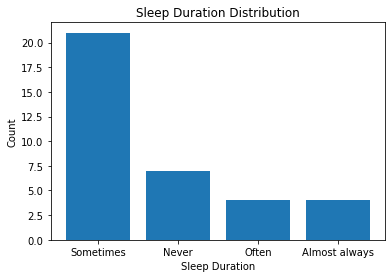

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a bar plot
value_counts = data["On average,do you get less than 7-8 hours of sleep a night?"].value_counts()
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.title("Sleep Duration Distribution")

# Display the plot
plt.show()

few people do get the 7-8 hours of sleep on average at night while most people sometimes get the 7-8 hours sleep a night from the plot above.

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 51
Data columns (total 32 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   start                                                                              36 non-null     datetime64[ns]
 1   end                                                                                36 non-null     datetime64[ns]
 2   Name of the respondent                                                             36 non-null     object        
 3   Gender                                                                             36 non-null     object        
 4   Age                                                                                36 non-null     int32         
 5   Tick the right choice                                           

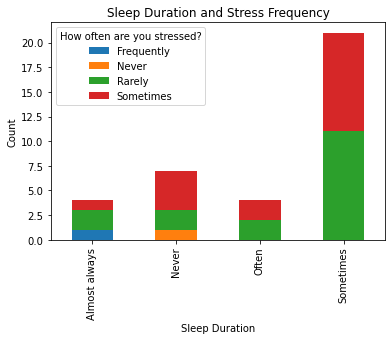

In [92]:
import matplotlib.pyplot as plt

# Group the data by "On average, do you get less than 7-8 hours of sleep a night?" and another categorical variable
grouped_data = data.groupby(
    ["On average,do you get less than 7-8 hours of sleep a night?", "How often are you stressed?"]).size().unstack()

# Create the stacked bar plot
grouped_data.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.title("Sleep Duration and Stress Frequency")

# Display the plot
plt.show()

People who almost always get 7-8 hours of sleep a night, they rarely get stressed
while people who never get 7-8 hours sleep at night  often experience stress.

In [94]:
data["Gender"].value_counts()

Gender
Female    20
Male      16
Name: count, dtype: int64

In [95]:
data.Gender.isna().sum()

0

In [96]:
data["How do you rate yourself in terms of sociability?"].value_counts()

How do you rate yourself in terms of sociability?
Very sociable                20
Sociable only when needed    10
Prefer being alone            6
Name: count, dtype: int64

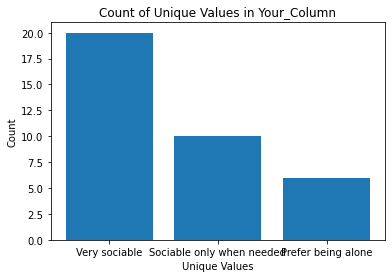

In [97]:

# Count the occurrences of each unique value in the column
value_counts = data['How do you rate yourself in terms of sociability?'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Your_Column')

# Display the plot
plt.show()

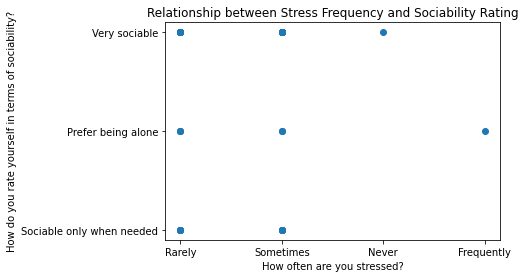

In [99]:
# Create a scatter plot
plt.scatter(data['How often are you stressed?'],
            data['How do you rate yourself in terms of sociability?'])

# Add labels and title
plt.xlabel('How often are you stressed?')
plt.ylabel('How do you rate yourself in terms of sociability?')
plt.title('Relationship between Stress Frequency and Sociability Rating')

# Display the plot
plt.show()

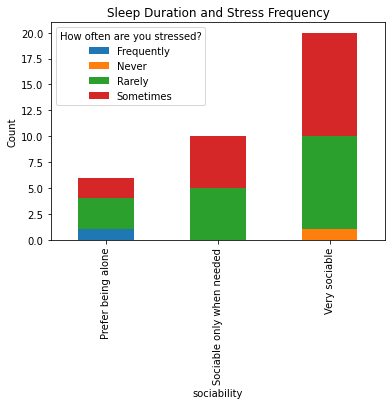

In [104]:

# Group the data by "On average, do you get less than 7-8 hours of sleep a night?" and another categorical variable
grouped_data = data.groupby(
    ["How do you rate yourself in terms of sociability?", "How often are you stressed?"]).size().unstack()

# Create the stacked bar plot
grouped_data.plot(kind="bar", stacked=True)

# Add labels and title
plt.xlabel("sociability")
plt.ylabel("Count")
plt.title("Sleep Duration and Stress Frequency")

# Display the plot
plt.show()

Most people who prefer being alone rarely get stressed simmilar to people who are very sociable and some people who prefer being alone too frequently get depressed.

In [105]:
import seaborn as sns

# Select the columns of interest
columns_of_interest = ["Age", "Gender", "How often are you stressed?",
                       "On average,do you get less than 7-8 hours of sleep a night?",
                       "Do you feel irritable, annoyed, or angry over trivial issues?",
                       "How do you rate yourself in terms of sociability?"]

# Create a subset of the data with the selected columns
subset_data = data[columns_of_interest].copy()

# Replace any missing values or encode categorical variables if needed

# Visualize the relationships between the columns using a pair plot
sns.pairplot(subset_data, hue="Gender")

KeyError: "['Do you feel irritable, annoyed, or angry over trivial issues?'] not in index"